<a href="https://colab.research.google.com/github/Kanchanasud/bsc_dpdm22/blob/main/dataprep3_Discretization_Normalization_One_hot_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Normalization-Standdardization

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')
     

Mounted at /content/drive


#ใช้ data กรมอุตุ

In [11]:
wather_data = pd.read_csv('/content/drive/MyDrive/bsc_DMPM_data/Group6_2กาญจนสุดา_16วรรณนภา_21เกลิดา_31ศิริขวัญ.csv')
wather_data.head()

,จังหวัด,วันที่,เดือนที่,ปีที่,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด
0,ขอนแก่น,1,10,2011,1005.47,83,3,9,1.4,24.2,27.6,24.8
1,ขอนแก่น,2,10,2011,1006.65,92,2,10,17.7,24.0,25.6,23.0
2,ขอนแก่น,3,10,2011,1007.49,86,3,10,3,22.9,25.6,22.1
3,ขอนแก่น,4,10,2011,1008.28,80,2,8,0,21.9,25.8,22.8
4,ขอนแก่น,5,10,2011,1009.88,86,2,10,2.2,21.7,24.3,23.1


In [10]:
data_features = wather_data.iloc[:,4:-1]
data_features.head()

,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม
0,1005.47,83,3,9,1.4,24.2,27.6
1,1006.65,92,2,10,17.7,24.0,25.6
2,1007.49,86,3,10,3,22.9,25.6
3,1008.28,80,2,8,0,21.9,25.8
4,1009.88,86,2,10,2.2,21.7,24.3


In [13]:
data_features.dtypes #ดูชนิดข้อมูล   #ข้อมูลหายไป 3 อัน คือ ความเร็วลม, จำนวนเมฆ,ปริมาณฝน

ความกด                float64
ความชื้นสัมพัทธ์        int64
ความเร็วลม             object
จำนวนเมฆ               object
ปริมาณฝน               object
อุณหภูมิจุดน้ำค้าง    float64
อุณหภูมิตุ้ม          float64
dtype: object

In [14]:
data_features['ความเร็วลม'] = data_features['ความเร็วลม'].astype(int)

ValueError: ignored

In [16]:
wather_data[wather_data.eq('_').any(1)] #หา data ที่ผิด ขึ้นแบบนี้แสดงว่าหาไม่เจอ

,จังหวัด,วันที่,เดือนที่,ปีที่,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด


In [18]:
wather_data[wather_data['ความเร็วลม'].eq('-')]  ##หา data ที่ผิด 

,จังหวัด,วันที่,เดือนที่,ปีที่,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด
1079,ขอนแก่น,21,10,2018,1012.65,87,-,-,53.3,23.5,25.8,24.5
1122,ขอนแก่น,3,12,2018,1011.47,61,-,-,-,19.7,28.5,22.7
1773,นครพนม,18,1,2012,1008.50,73,-,4,0,20.2,25.6,20
1776,นครพนม,21,1,2012,1009.51,89,-,7,1.2,22.0,24.2,21.1
1856,นครพนม,10,11,2012,1009.45,73,-,4,0,23.9,29.7,24.9
1862,นครพนม,16,11,2012,1011.50,70,-,6,0,21.0,27.5,22.2
1927,นครพนม,20,1,2013,1015.58,65,-,2,0,15.0,22.7,15.3
1995,นครพนม,29,10,2013,1014.22,67,-,1,-,19.4,26.5,20.6
2063,นครพนม,5,1,2014,1013.33,68,-,-,-,14.0,21.0,-
2125,นครพนม,8,10,2014,1011.17,72,-,8,0,21.3,27.1,23.0


In [39]:
data_features_d = data_features
data_features_d 

,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม
0,1005.47,83,3,9,1.4,24.2,27.6
1,1006.65,92,2,10,17.7,24.0,25.6
2,1007.49,86,3,10,3,22.9,25.6
3,1008.28,80,2,8,0,21.9,25.8
4,1009.88,86,2,10,2.2,21.7,24.3
...,...,...,...,...,...,...,...
8164,1008.39,69,1,0,0,18.4,26.8
8165,1006.05,61,1,0,0,17.3,27.8
8166,1004.86,55,2,0,0,13.0,26.3
8167,1005.76,56,1,2,0,13.8,25.2


In [44]:
data_features = data_features[data_features.eq('-').any(1)==False]
data_features.shape


(5208, 7)

In [45]:
data_features = data_features[data_features.eq('T').any(1)==False]
data_features.shape

(5061, 7)

In [51]:
data_features['ความกด'] = data_features['ความกด'].asty(float)

#data_features['จำนวนเมฆ'] = data_features['จำนวนเมฆ'].asty(float)
#data_features['ปริมาณฝน'] = data_features['ปริมาณฝน'].asty(float)

AttributeError: ignored

In [47]:
data_features_d.describe()

,ความกด,ความชื้นสัมพัทธ์,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม
count,8169.000000,8169.000000,8169.000000,8169.000000
mean,1013.016946,69.798262,18.151916,24.868405
std,3.224640,8.870501,3.775475,2.846185
min,1002.040000,38.000000,1.500000,11.800000
25%,1010.960000,64.000000,15.800000,23.300000
50%,1012.800000,69.000000,18.400000,25.300000
75%,1015.010000,75.000000,21.000000,27.000000
max,1026.100000,99.000000,28.400000,31.000000


In [23]:
#wather_data.drop(columns='ความเร็วลม')

,จังหวัด,วันที่,เดือนที่,ปีที่,ความกด,ความชื้นสัมพัทธ์,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด
0,ขอนแก่น,1,10,2011,1005.47,83,9,1.4,24.2,27.6,24.8
1,ขอนแก่น,2,10,2011,1006.65,92,10,17.7,24.0,25.6,23.0
2,ขอนแก่น,3,10,2011,1007.49,86,10,3,22.9,25.6,22.1
3,ขอนแก่น,4,10,2011,1008.28,80,8,0,21.9,25.8,22.8
4,ขอนแก่น,5,10,2011,1009.88,86,10,2.2,21.7,24.3,23.1
...,...,...,...,...,...,...,...,...,...,...,...
8164,เลย,24,2,2021,1008.39,69,0,0,18.4,26.8,18.0
8165,เลย,25,2,2021,1006.05,61,0,0,17.3,27.8,19.5
8166,เลย,26,2,2021,1004.86,55,0,0,13.0,26.3,16.0
8167,เลย,27,2,2021,1005.76,56,2,0,13.8,25.2,15.3


In [41]:
#คำนวณค่าทางสถิติ
data_features.describe()

,ความกด,ความชื้นสัมพัทธ์,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม
count,8169.000000,8169.000000,8169.000000,8169.000000
mean,1013.016946,69.798262,18.151916,24.868405
std,3.224640,8.870501,3.775475,2.846185
min,1002.040000,38.000000,1.500000,11.800000
25%,1010.960000,64.000000,15.800000,23.300000
50%,1012.800000,69.000000,18.400000,25.300000
75%,1015.010000,75.000000,21.000000,27.000000
max,1026.100000,99.000000,28.400000,31.000000


In [ ]:
####################################################################################

In [ ]:
from matplotlib import preprocessing #อันที่ 2

In [ ]:
### 

#deffine บอกวิธีการที่จะทำ
scaler = preprocessing.StandardScaler()
#train
scaler.fit(data_features_d)
#predict-transfoem
data_features_d_s = scaler.transform(data_features_d) 


In [ ]:
data_features_d_s() #ตามไม่ทัน  ตัวแปรอาจจะไม่ตรง 

In [ ]:
#ปรับกราฟให้สวย ตามไม่ทัน
plt.subplot

#Min-max normalization

In [ ]:
### 

#deffine บอกวิธีการที่จะทำ
scaler = preprocessing.MinMaxScaler() #คำว่า Scaler ปรับขนาดให้เท่ากัน
#train
scaler.fit(data_features_d)
#predict-transfoem
data_features_d_norm = scaler.transform(data_features_d) 

In [ ]:
############################################################# เรื่องที่ 2 ######################################################################################

#ใช้ data บ้าน

In [52]:
home_data = pd.read_csv('/content/drive/MyDrive/bsc_DMPM_data/2_กาญจนสุดา ผุยมูลตรี.csv')
home_data.head()

,Unnamed: 0,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,project_name,district,zone,street,sell_price
0,0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,1.0,กันยารัตน์ เดอวินเทจ,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,NaN,2700000.0
1,1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,1.0,จันทร์ประเสริฐแกรนด์,เมืองขอนแก่น,กลางเมือง-เมืองเก่า-กุดกว้าง,NaN,2600000.0
2,2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,โพธิสาร,5900000.0
3,3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,โครงการหมู่บ้านเรา 2,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,NaN,4400000.0
4,4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,โครงการหมู่บ้านเรา 2,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,ศรีจันทร์,2750000.0


In [53]:
home_data.shape

(100, 17)

#ลบ

In [59]:
home_data = home_data.dropna(subset=['sell_price'])

In [62]:
from matplotlib import pyplot as plt

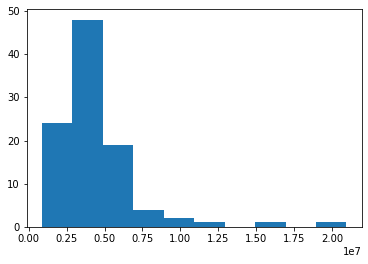

In [63]:
plt.hist(home_data['sell_price']);

### แปลงค่า sell_price
- ราคาตํ่ากว่า 5 ล้าน ให้เป็น 1 

- ราคาระหว่าง 5ล้าน - 10ล้าน ให้เป็น 2

- ราคา 1m ขึ้นไป ให้เป็น 3

In [66]:
home_data = home_data[home_data('sell_price')<5000000]
price_undert.insert(22,'price_class','1')
price_undert

TypeError: ignored

In [ ]:
#สร้างลูป
def filter(x);
    if x < 5000000;
    if y <= 1

# one-hot-Encoder (อันที่3)

In [67]:
home_data_dummies = pd.get_dummies(home_data,columns=['zone'])

In [68]:
home_data_dummies 

,Unnamed: 0,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,...,zone_ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,zone_บ้านเป็ด-โคกฟันโปง,zone_ม.ภาค-บ้านกอก-บึงหนองโคตร,zone_มะลิวัลย์-ร.8-สนามบิน,zone_ศิลา-โกทา-หนองไผ่-บ้านดอน,zone_สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,zone_เหล่านาดี-บ้านสะอาด-บ้านโจด,zone_โนนทัน-บึงแก่นนคร,zone_โนนม่วง-มข.-เลี่ยงเมือง-โนนเรือง,zone_ในเมือง-รื่นรมย์-เทพารักษ์
0,0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,19495.0,0.0,1.0,76.2,2.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
96,96,19496.0,0.0,2.0,56.8,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
97,97,20164.0,0.0,1.0,2.0,1.0,4.0,2.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
98,98,31.0,0.0,0.0,55.8,2.0,3.0,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
